<a href="https://colab.research.google.com/github/Dan-Blanchette/Python_4ML/blob/main/Final_Project/k_means/k_means_segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'K-means: k=5')

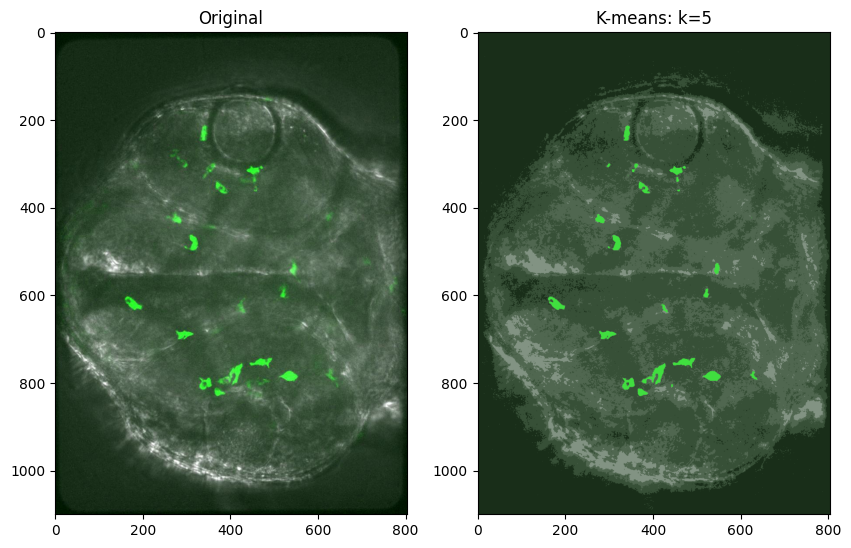

In [1]:
'''
@author Dan Blanchette
@date May 3, 2023
'''

import numpy as np
import matplotlib.pyplot as plt
import cv2

# create a figure 
fig = plt.figure(figsize=(10,7))

rows = 1
cols = 2

img = cv2.imread('1.png')

# reshape image to help implement k-means algorithm
img2 = img.reshape((-1,3))

# convert image to float32 to apply cv2 k-means
img2 = np.float32(img2)

# define number of cluster and apply k-means
# max iterations is 10 and epsilon = 1.0
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Clusters
k = 5

attempts = 10

# returns compactness of cluster
# returns labels
# center of the cluster (centroid)
# Can use K-means PP_CENTERS OR RANDOM_CENTERS
ret, label, center = cv2.kmeans(img2, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

# center of each cluster
center = np.uint8(center)

res = center[label.flatten()]
# conver the dimensions back to image
res2 = res.reshape((img.shape))

cv2.imwrite('1segemented.png',res2)

seg = cv2.imread('1segemented.png')

fig.add_subplot(rows, cols, 1)

plt.imshow(img)
# plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, cols, 2)
plt.imshow(seg)
plt.title('K-means: k=5')


Refactored Code

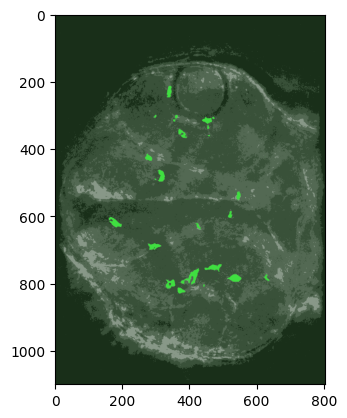

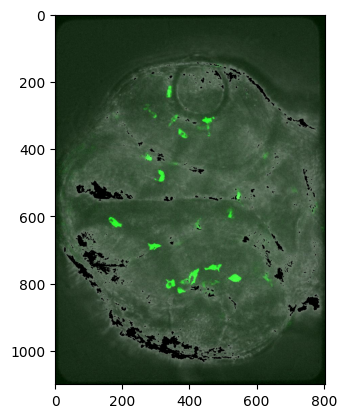

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

def read_image(file_path):
  """Read the images and format to RGB."""
  image = cv2.imread(file_path)
  return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def preProcessImage(image_name):
  """Reshape the image into a 2D array of pixels and three color channel values (RGB), then convert to float."""
  pixel_val = image_name.reshape((-1,3))
  return np.float32(pixel_val)

def kmeans_clustering(pixel_val, k =3):
  """Apply k means clustering to each of the pixel values."""
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
  # last parameter can be adjusted to use PP_CENTERS for centroid calculation if random centers do no yield decent resuts
  compactness, labels, centers = cv2.kmeans(pixel_val, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
  return compactness, labels, np.uint8(centers)

def segment_image(image, labels, centers):
  """Segment each image using the cluster centroid(s)."""
  segmentedImage = centers[labels.flatten()]
  return segmentedImage.reshape(image.shape)

def imageMask(image, labels, disabledCluster):
  """Generate a masked image by disabling a defined cluster"""
  maskedImage = np.copy(image).reshape((-1,3))
  maskedImage[labels.flatten() == disabledCluster] = [0,0,0]
  return maskedImage.reshape(image.shape)

def displayImg(image):
  """Display the iamge using matplotlib."""
  plt.imshow(image)
  plt.show()


# MAIN CODE
def main():
  # image_path = sys.argv[1]
  # k = int(sys.argv[2])
  k = 5
  # read the image data
  # image = read_image('image_path')
  image = read_image('1.png')

  # pre-process the image

  pixel_val = preProcessImage(image)

  compactness, labels, centers = kmeans_clustering(pixel_val, k)

  segmented_img = segment_image(image, labels, centers)

  displayImg(segmented_img)

  cluster_to_black = 2

  masked_image = imageMask(image, labels, cluster_to_black)

  displayImg(masked_image)

if (__name__ == '__main__'):
  main()